In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

## Об используемом датасете
Датасет представляют собой информацию о жилой недвижимости взависимости от района в Калифорнии по переписи 1990-ого года. Зависимая переменная - средняя цена на жилье в районе, предикторы - все остальное. </br>
Источник: https://www.kaggle.com/camnugent/california-housing-prices

In [2]:
data = pd.read_csv("housing.csv")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
data.shape

(20640, 10)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
replace_dict = {"ocean_proximity":{"<1H OCEAN":0, "INLAND": 1, "NEAR OCEAN":2, "NEAR BAY":3,"ISLAND":4 }}

data.replace(replace_dict, inplace=True)
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


### Заполнение пропущенных значений

In [7]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
totbedrooms_mean = data["total_bedrooms"].mean()
data = data.fillna(totbedrooms_mean)

In [9]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

### Небольшой EDA

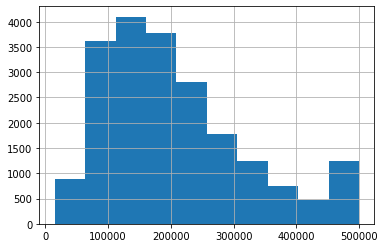

In [10]:
# не похоже на нормальное распределние 
data["median_house_value"].hist()

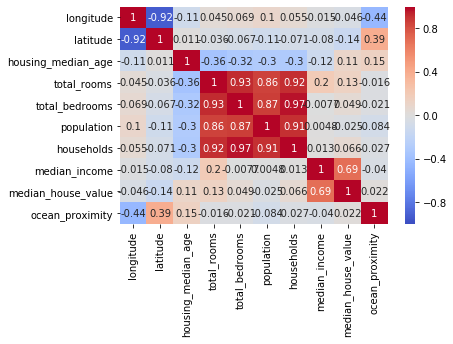

In [11]:
#корреляционная матрица
cov_mat = data.corr()
sns.heatmap(cov_mat, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Некоторые признаки коррелируют между собой. Может возникнуть проблема мультиколлинеарности. 

### Подготовка данных

In [12]:
y_colname = "median_house_value"
X = data.loc[:, data.columns != y_colname]
y = data[y_colname]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.25)

### Построение модели

In [14]:
model = LinearRegression(normalize = True)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
model.coef_

array([-4.33486066e+04, -4.26355943e+04,  1.19042455e+03, -7.92775980e+00,
        1.20691260e+02, -3.86810257e+01,  4.09225440e+01,  4.02706973e+04,
       -2.12080179e+03])

In [17]:
preds = model.predict(X_test)

In [18]:
prices_mean = data[y_colname].mean()

print("MAE:", metrics.mean_absolute_error(y_test, preds))
print("MSE:", metrics.mean_squared_error(y_test, preds))
print("R2 score:", metrics.r2_score(y_test, preds))
print("Relative MAE:",metrics.mean_absolute_error(y_test, preds)/prices_mean)

MAE: 51439.49876339408
MSE: 4938926201.492031
R2 score: 0.6267488947473006
Relative MAE: 0.24867320403198784


In [19]:
def print_metrics(y_test, preds):
    print("MAE:", metrics.mean_absolute_error(y_test, preds))
    print("MSE:", metrics.mean_squared_error(y_test, preds))
    print("R2 score:", metrics.r2_score(y_test, preds))
    print("Relative MAE:",metrics.mean_absolute_error(y_test, preds)/prices_mean)

## Одномерные варианты

----- longitude -----
MAE: 90641.81892949226
MSE: 13209653956.387121
R2 score: 0.0017024474393453337
Relative MAE: 0.4381883975223417
----- latitude -----
MAE: 90068.94877960274
MSE: 12937288274.0091
R2 score: 0.02228602934218704
Relative MAE: 0.4354189798745809
----- housing_median_age -----
MAE: 90406.29215766411
MSE: 13065943898.87335
R2 score: 0.0125630952025656
Relative MAE: 0.43704979395127624
----- total_rooms -----
MAE: 89728.74553623669
MSE: 12987223101.780167
R2 score: 0.018512288068117444
Relative MAE: 0.4337743403935657
----- total_bedrooms -----
MAE: 90769.39182757156
MSE: 13197054634.775137
R2 score: 0.0026546201435430072
Relative MAE: 0.43880512128667976
----- population -----
MAE: 90988.90814246598
MSE: 13227381191.766306
R2 score: 0.00036274121001211856
Relative MAE: 0.4398663257438456
----- households -----
MAE: 90594.13533003093
MSE: 13163294445.89375
R2 score: 0.005205990076892264
Relative MAE: 0.4379578814064602
----- median_income -----
MAE: 62689.704626466264
MSE

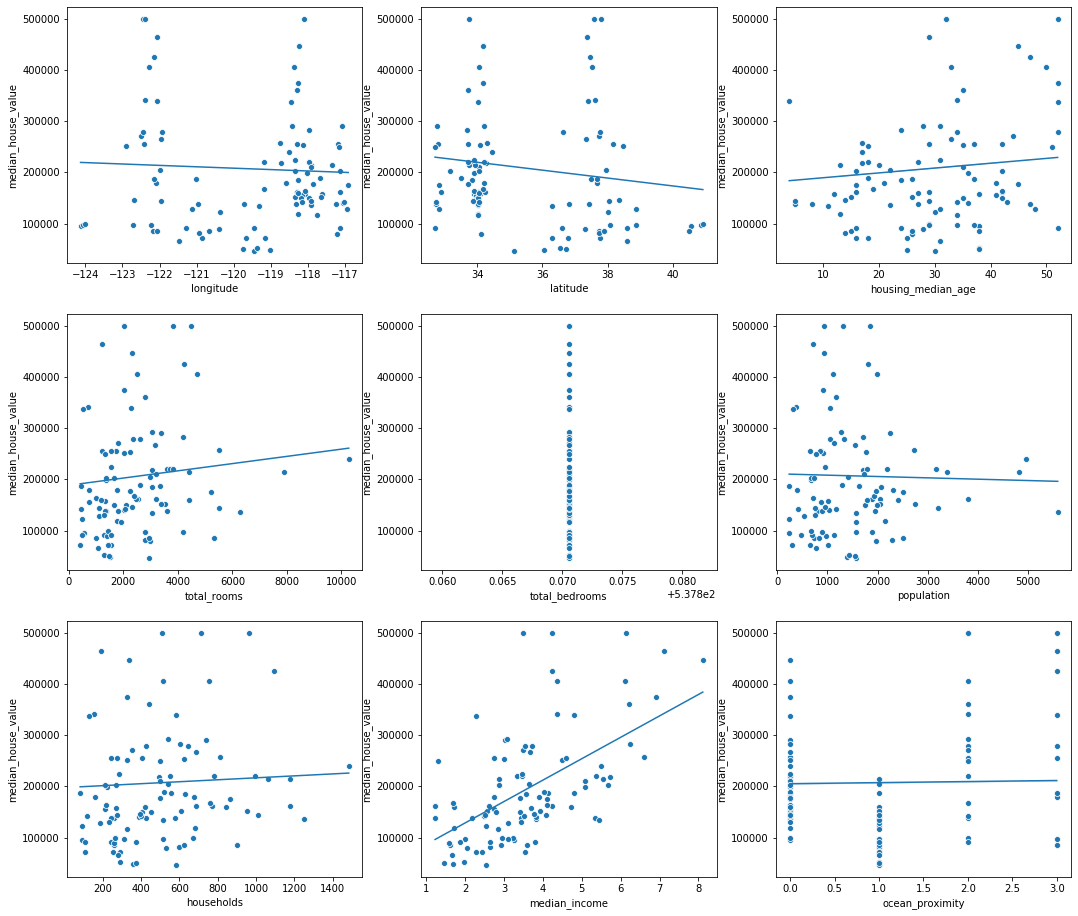

In [20]:
y_colname = "median_house_value"

X_cols = data.loc[:, data.columns != y_colname].columns

fig, axs = plt.subplots(nrows = 3, ncols =3, figsize=(18, 16))

for i, x_colname in enumerate(X_cols):
    X = data[x_colname].values.reshape(-1, 1)
    y = data[y_colname]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.25)

    model = LinearRegression(normalize = True)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("-----", x_colname, "-----")
    print_metrics(y_test, preds)
    # строим графики для первых 100 точек из test, 
    sns.scatterplot(X_test.flatten()[:100], y_test[:100], ax=axs[i//3][i%3])
    sns.lineplot(X_test.flatten()[:100], preds[:100], ax=axs[i//3][i%3])
    axs[i//3][i%3].set(xlabel=x_colname, ylabel=y_colname)

### Model selection
1. Начнём с одного признака, который показал наибольший коэфициент детерминации в прошлой клетке - это средний доход. 
2. Будем добавлять жадно по одному признаку? чтобы уменьшение ошибки было максимальным. 

In [47]:
cur_X = data['median_income'].to_frame()
y = data[y_colname]

remaining_cols = data.loc[:, data.columns != y_colname].columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.25)
model.fit(X_train, y_train)
preds = model.predict(X_test)
cur_mse = metrics.mean_squared_error(y_test, preds)
remaining_cols = remaining_cols.drop("median_income")

while len(remaining_cols):
    candidates_mse = np.zeros(len(remaining_cols))
    
    for i, candidate_col in enumerate(remaining_cols):
        X_cand = cur_X.copy()
        X_cand[candidate_col] = data[candidate_col].values # добавляем столбец кандидат к имеющимся
        X_train, X_test, y_train, y_test = train_test_split(X_cand, y, random_state = 42, shuffle = True, test_size = 0.25)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        candidates_mse[i] = metrics.mean_squared_error(y_test, preds)
        
    best_candidate_index, best_candidate_mse = np.argmin(candidates_mse), np.min(candidates_mse)
    
    print("Candidates:" , candidates_mse)
    print("Current MSE:", cur_mse)
    print("------")
    
    if best_candidate_mse <= cur_mse:
        cur_X[remaining_cols[best_candidate_index]] = data[remaining_cols[best_candidate_index]] # добавляем столбец кандидат к имеющимся
        cur_mse = best_candidate_mse
        remaining_cols = remaining_cols.drop(remaining_cols[best_candidate_index])# убираем из remaining cols
    else:
        break # если не нашлось колонки, которая уменьшает mse то выходим

Candidates: [6.98656715e+09 6.89403583e+09 6.50919281e+09 7.00183982e+09
 6.96615118e+09 6.99147108e+09 6.95413394e+09 6.95615951e+09]
Current MSE: 13221318562.14552
------
Candidates: [6.50814354e+09 6.39547026e+09 6.44839280e+09 6.32130137e+09
 6.49478451e+09 6.30376681e+09 6.49651158e+09]
Current MSE: 6509192814.246536
------
Candidates: [6.30051701e+09 6.21664945e+09 6.10808346e+09 6.33987721e+09
 5.88766423e+09 6.29292162e+09]
Current MSE: 6303766805.985064
------
Candidates: [5.88748763e+09 5.75216822e+09 5.77406993e+09 5.89920321e+09
 5.89131916e+09]
Current MSE: 5887664225.744334
------
Candidates: [4.86312262e+09 5.66925675e+09 5.76252797e+09 5.71859986e+09]
Current MSE: 5752168222.000742
------
Candidates: [4.86030567e+09 4.91565772e+09 4.86697908e+09]
Current MSE: 4863122620.424259
------
Candidates: [4.93296830e+09 4.86443212e+09]
Current MSE: 4860305669.470088
------


In [48]:
cur_X.columns # вот эти признаки нужны для получения наилучшего r2

Index(['median_income', 'housing_median_age', 'households', 'population',
       'latitude', 'longitude', 'total_rooms'],
      dtype='object')

In [49]:
remaining_cols

Index(['total_bedrooms', 'ocean_proximity'], dtype='object')

In [50]:
preds = model.predict(X_test)
metrics.r2_score(y_test, preds)

0.6323786604341681